In [74]:
import pandas as pd
import numpy as np 
import seaborn as sn
import matplotlib.pyplot as plt
import plotly.express  as px

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import accuracy_score, confusion_matrix

In [75]:
base = pd.read_csv("datasets/census.csv")
base.columns

Index(['age', 'workclass', 'final-weight', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loos', 'hour-per-week', 'native-country',
       'income'],
      dtype='object')

In [76]:
# Variable containing prev features, 
# for default X meaning to prev and y the label, in this case -> income  

X_census = base.iloc[:, 0:14].values
X_census

array([[39, ' State-gov', 77516, ..., 0, 40, ' United-States'],
       [50, ' Self-emp-not-inc', 83311, ..., 0, 13, ' United-States'],
       [38, ' Private', 215646, ..., 0, 40, ' United-States'],
       ...,
       [58, ' Private', 151910, ..., 0, 40, ' United-States'],
       [22, ' Private', 201490, ..., 0, 20, ' United-States'],
       [52, ' Self-emp-inc', 287927, ..., 0, 40, ' United-States']],
      dtype=object)

In [77]:
y_census = base.iloc[:, 14].values
y_census # label, class

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [78]:
onehotencoder_census = ColumnTransformer(transformers=[('Onehot', OneHotEncoder(), [1, 3, 5, 6, 7, 8, 9, 13])], remainder='passtrough')
onehotencoder_census = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [1,3,5,6,7,8,9,13])], remainder='passthrough')
X_census = onehotencoder_census.fit_transform(X_census).toarray()
X_census

array([[0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 2.1740e+03, 0.0000e+00,
        4.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.3000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        4.0000e+01],
       ...,
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        4.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        2.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.5024e+04, 0.0000e+00,
        4.0000e+01]])

In [79]:
scaler_census = StandardScaler()
X_census = scaler_census.fit_transform(X_census)

In [80]:
X_census_train, X_census_test, y_census_train, y_census_test = train_test_split(X_census, y_census, test_size = 0.15, random_state = 0)

In [81]:
KNN_census = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
KNN_census.fit(X_census_train, y_census_train)

KNeighborsClassifier()

In [82]:
predict = KNN_census.predict(X_census_test) # Faz previsões usando o modelo Naive Bayes treinado nos dados de test e armazena na variavel predict

predict

array([' <=50K', ' <=50K', ' >50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [83]:
accuracy_score(y_census_test, predict) # acurácia maior caso não seja realizado o escalonamento, neste caso 

0.8223132036847492

Text(0.5, 1.0, 'Matriz de Confusão')

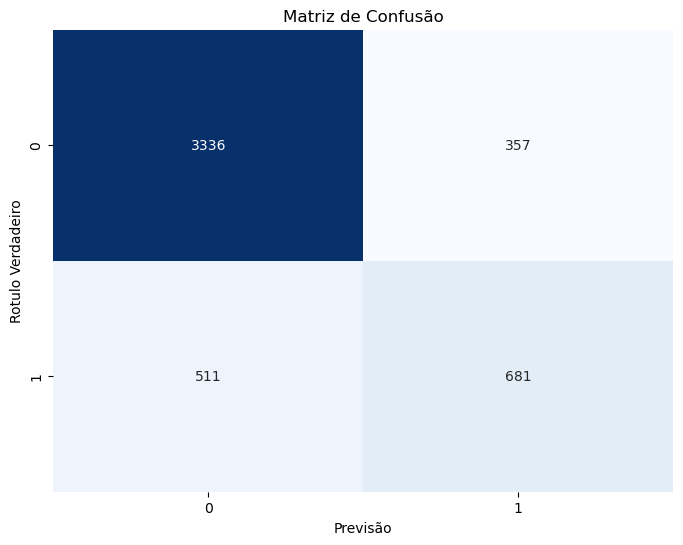

In [84]:
y_true = y_census_test  # Rótulos verdadeiros
y_pred = predict  # Previsões do modelo

# Calcula a matriz de confusão
cm = confusion_matrix(y_true, y_pred)

# Plota a matriz de confusão como um mapa de calor (heatmap)
plt.figure(figsize=(8, 6))
sn.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Previsão')
plt.ylabel('Rotulo Verdadeiro')
plt.title('Matriz de Confusão')

In [85]:
print(classification_report(y_census_test, predict))


              precision    recall  f1-score   support

       <=50K       0.87      0.90      0.88      3693
        >50K       0.66      0.57      0.61      1192

    accuracy                           0.82      4885
   macro avg       0.76      0.74      0.75      4885
weighted avg       0.82      0.82      0.82      4885



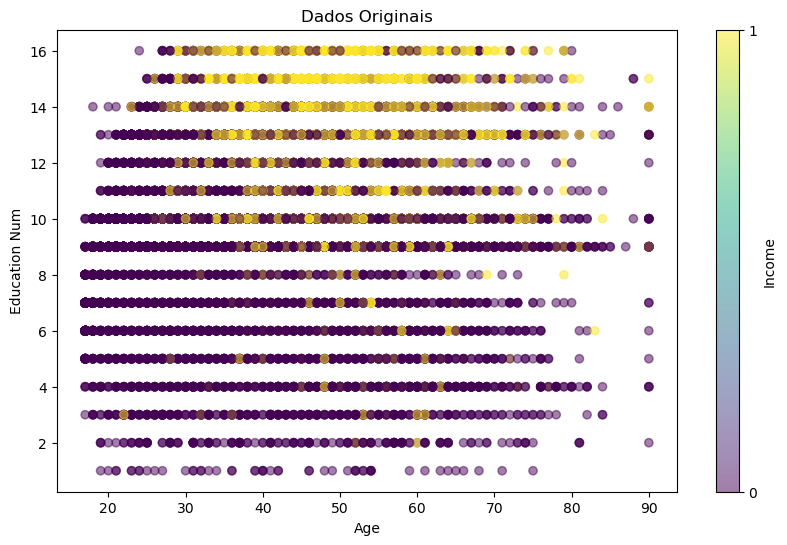

In [86]:
label_enconder_test = LabelEncoder() # Instanciando um objeto da classe LabelEncoder

# Selecionando apenas duas características para visualização
X_census_plot2 = base[['education-num', 'capital-gain']].values
y_census_plot = base['income'].values

# Codificando os rótulos (income)
label_encoder = LabelEncoder()
y_census_plot_encoded = label_encoder.fit_transform(y_census_plot)

# Plotando os dados
plt.figure(figsize=(10, 6))
plt.scatter(X_census_plot[:, 0], X_census_plot[:, 1], c=y_census_plot_encoded, cmap='viridis', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Education Num')
plt.title('Dados Originais')
plt.colorbar(ticks=[0, 1], label='Income')
plt.show()


In [87]:
# Treinando o KNN com as duas características selecionadas
X_train_plot, X_test_plot, y_train_plot, y_test_plot = train_test_split(X_census_plot, y_census_plot_encoded, test_size=0.15, random_state=0)
knn_plot = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn_plot.fit(X_train_plot, y_train_plot)

# Plotando a fronteira de decisão
h = .02  # step size in the mesh
x_min, x_max = X_census_plot[:, 0].min() - 1, X_census_plot[:, 0].max() + 1
y_min, y_max = X_census_plot[:, 1].min() - 1, X_census_plot[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn_plot.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap='viridis')
plt.scatter(X_test_plot[:, 0], X_test_plot[:, 1], c=y_test_plot, edgecolors='k', marker='o', alpha=0.6, cmap='viridis')
plt.xlabel('Feature X')
plt.ylabel('Feature Y')
plt.title('Decision Boundary of KNN')
plt.show()


KeyboardInterrupt: 

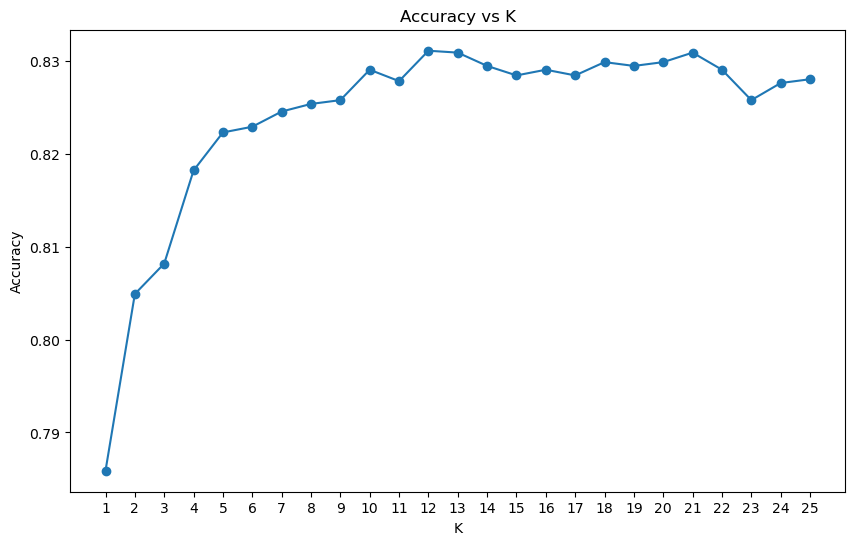

In [88]:
# Testando diferentes valores de K e plotando a precisão
k_range = range(1, 26)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_census_train, y_census_train)
    y_pred = knn.predict(X_census_test)
    scores.append(accuracy_score(y_census_test, y_pred))

plt.figure(figsize=(10, 6))
plt.plot(k_range, scores, marker='o')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Accuracy vs K')
plt.xticks(np.arange(1, 26, 1))
plt.show()
